In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
frd_det = pd.read_csv('E:/1Top Mentor/Assignments/4_JULY class/22_ 24 july/10. Random Forests/Fraud_check.csv')
frd_det

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

# Data preprocessing

In [3]:
frd_det.shape

(600, 6)

In [4]:
frd_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
frd_det.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [6]:
frd_det.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [7]:
frd_det['Marital.Status'] = frd_det['Marital.Status'].map({'Single':1,'Married':2,'Divorced':3})
frd_det['Marital.Status']

0      1
1      3
2      2
3      1
4      2
      ..
595    3
596    3
597    3
598    2
599    3
Name: Marital.Status, Length: 600, dtype: int64

In [8]:
frd_det['Urban'] = frd_det['Urban'].map({'YES':1,'NO':0})
frd_det['Urban']

0      1
1      1
2      1
3      1
4      0
      ..
595    1
596    1
597    1
598    0
599    0
Name: Urban, Length: 600, dtype: int64

In [9]:
frd_det['Undergrad'] = frd_det['Undergrad'].map({'YES':1,'NO':0})
frd_det['Undergrad']

0      0
1      1
2      0
3      1
4      0
      ..
595    1
596    1
597    0
598    1
599    0
Name: Undergrad, Length: 600, dtype: int64

In [10]:
frd_det

Undergrad  Marital.Status  Taxable.Income  City.Population  \
0            0               1           68833            50047   
1            1               3           33700           134075   
2            0               2           36925           160205   
3            1               1           50190           193264   
4            0               2           81002            27533   
..         ...             ...             ...              ...   
595          1               3           76340            39492   
596          1               3           69967            55369   
597          0               3           47334           154058   
598          1               2           98592           180083   
599          0               3           96519           158137   

     Work.Experience  Urban  
0                 10      1  
1                 18      1  
2                 30      1  
3                 15      1  
4                 28      0  
..               ...    ...  
595                7      1  
596                2      1  
597                0      1  
598               17      0  
599               16      0  

[600 rows x 6 columns]

In [11]:
frd_det['Taxable.Income'].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

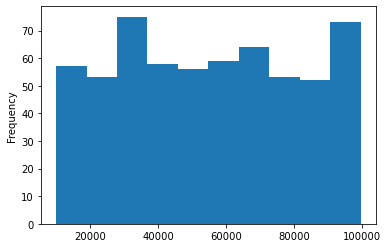

In [12]:
frd_det['Taxable.Income'].plot.hist()
plt.show()

In [13]:
#Converting the Sales column which is continuous into categorical
category = pd.cut(frd_det['Taxable.Income'],bins=[0,30000,99619],labels=['Risky','Good'])

In [14]:
category

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [19]:
frd_det['Taxable_Group'] = category # add the new column

In [20]:
frd_det

Undergrad  Marital.Status  Taxable.Income  City.Population  \
0            0               1           68833            50047   
1            1               3           33700           134075   
2            0               2           36925           160205   
3            1               1           50190           193264   
4            0               2           81002            27533   
..         ...             ...             ...              ...   
595          1               3           76340            39492   
596          1               3           69967            55369   
597          0               3           47334           154058   
598          1               2           98592           180083   
599          0               3           96519           158137   

     Work.Experience  Urban Taxable_Group  
0                 10      1          Good  
1                 18      1          Good  
2                 30      1          Good  
3                 15      1          Good  
4                 28      0          Good  
..               ...    ...           ...  
595                7      1          Good  
596                2      1          Good  
597                0      1          Good  
598               17      0          Good  
599               16      0          Good  

[600 rows x 7 columns]

In [22]:
frd_det['Taxable_Group'] = frd_det['Taxable_Group'].map({'Good':1,'Risky':0})
frd_det['Taxable_Group']

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable_Group, Length: 600, dtype: category
Categories (2, int64): [0 < 1]

In [23]:
frd_det

Undergrad  Marital.Status  Taxable.Income  City.Population  \
0            0               1           68833            50047   
1            1               3           33700           134075   
2            0               2           36925           160205   
3            1               1           50190           193264   
4            0               2           81002            27533   
..         ...             ...             ...              ...   
595          1               3           76340            39492   
596          1               3           69967            55369   
597          0               3           47334           154058   
598          1               2           98592           180083   
599          0               3           96519           158137   

     Work.Experience  Urban Taxable_Group  
0                 10      1             1  
1                 18      1             1  
2                 30      1             1  
3                 15      1             1  
4                 28      0             1  
..               ...    ...           ...  
595                7      1             1  
596                2      1             1  
597                0      1             1  
598               17      0             1  
599               16      0             1  

[600 rows x 7 columns]

# EDA

In [24]:
import seaborn as sns

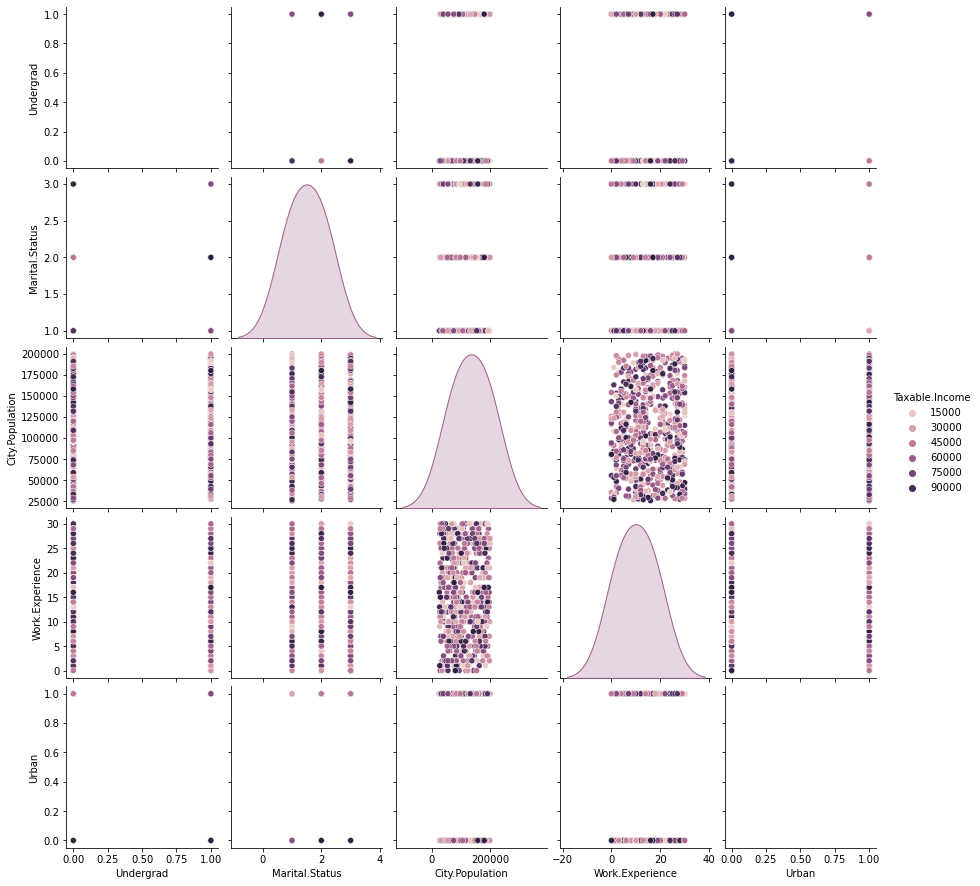

In [25]:
sns.pairplot(data=frd_det,hue = 'Taxable.Income')

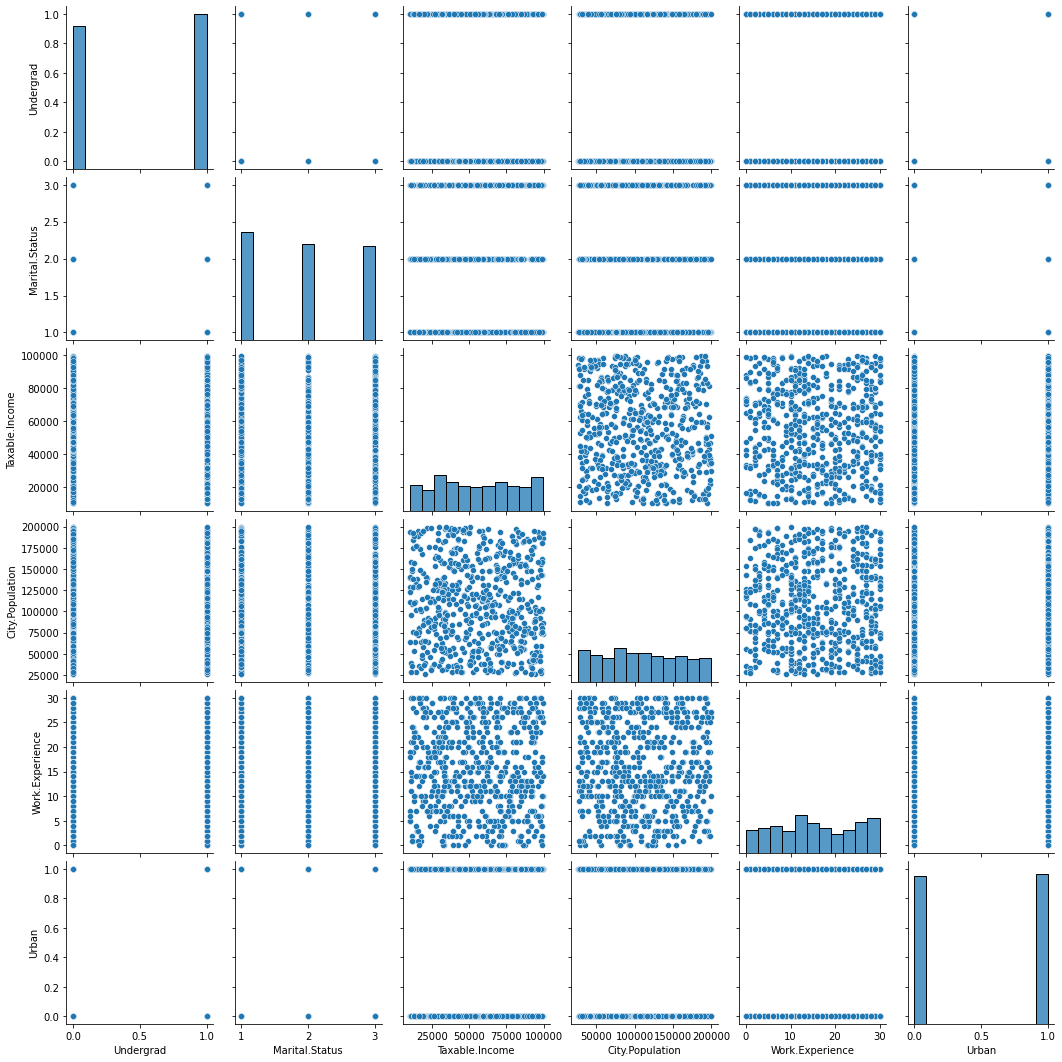

In [27]:
sns.pairplot(frd_det)

# Splitting data into training and testing data set

In [95]:
x=frd_det[['Undergrad','Marital.Status','City.Population','Work.Experience','Urban','Taxable_Group']]
y=frd_det['Taxable.Income']

In [96]:
x

Undergrad  Marital.Status  City.Population  Work.Experience  Urban  \
0            0               1            50047               10      1   
1            1               3           134075               18      1   
2            0               2           160205               30      1   
3            1               1           193264               15      1   
4            0               2            27533               28      0   
..         ...             ...              ...              ...    ...   
595          1               3            39492                7      1   
596          1               3            55369                2      1   
597          0               3           154058                0      1   
598          1               2           180083               17      0   
599          0               3           158137               16      0   

    Taxable_Group  
0               1  
1               1  
2               1  
3               1  
4               1  
..            ...  
595             1  
596             1  
597             1  
598             1  
599             1  

[600 rows x 6 columns]

In [97]:
y

0      68833
1      33700
2      36925
3      50190
4      81002
       ...  
595    76340
596    69967
597    47334
598    98592
599    96519
Name: Taxable.Income, Length: 600, dtype: int64

In [98]:
frd_det['Taxable.Income'].unique()

array([68833, 33700, 36925, 50190, 81002, 33329, 83357, 62774, 83519,
       98152, 29732, 61063, 11794, 61830, 64070, 69869, 24987, 39476,
       97957, 10987, 88636, 14310, 78969, 92040, 38239, 31417, 55299,
       87778, 10379, 94033, 73854, 64007, 97200, 82071, 12514, 31336,
       10163, 68513, 14912, 74010, 50777, 49436, 96485, 70339, 33614,
       81079, 31532, 44034, 16264, 45706, 79616, 40137, 97703, 21917,
       81939, 19925, 34703, 78573, 10870, 65065, 94418, 26972, 91684,
       51685, 62158, 58312, 42507, 61486, 10150, 99619, 89302, 94287,
       41344, 41382, 32434, 61105, 67628, 31458, 73411, 10329, 44947,
       35610, 66564, 87348, 69098, 28449, 39277, 13747, 86652, 26741,
       77634, 99325, 85651, 15296, 10348, 41395, 22258, 79583, 22187,
       52495, 93078, 35072, 32662, 89250, 41641, 55873, 19169, 46629,
       51927, 69224, 24557, 77762, 96355, 90910, 21945, 79357, 42784,
       54638, 29944, 97318, 52022, 20391, 21016, 26679, 70682, 87326,
       15853, 75501,

In [99]:
frd_det['Taxable.Income'].value_counts()

59689    2
68833    1
60822    1
93090    1
79373    1
        ..
61906    1
31088    1
70365    1
56536    1
96519    1
Name: Taxable.Income, Length: 599, dtype: int64

In [100]:
frd_det.describe()

Undergrad  Marital.Status  Taxable.Income  City.Population  \
count  600.000000      600.000000      600.000000       600.000000   
mean     0.520000        1.953333    55208.375000    108747.368333   
std      0.500017        0.821958    26204.827597     49850.075134   
min      0.000000        1.000000    10003.000000     25779.000000   
25%      0.000000        1.000000    32871.500000     66966.750000   
50%      1.000000        2.000000    55074.500000    106493.500000   
75%      1.000000        3.000000    78611.750000    150114.250000   
max      1.000000        3.000000    99619.000000    199778.000000   

       Work.Experience       Urban  
count       600.000000  600.000000  
mean         15.558333    0.503333  
std           8.842147    0.500406  
min           0.000000    0.000000  
25%           8.000000    0.000000  
50%          15.000000    1.000000  
75%          24.000000    1.000000  
max          30.000000    1.000000

# modelbuilding

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score
import time

In [102]:
ens = RandomForestClassifier(criterion='entropy')

In [103]:
ens_train = ens.fit(x,y)

In [104]:
start = time.time()
ens_pred = ens_train.predict(x)
end = time.time()
print("The total time taken - ", (end  -start))
ens_pred

The total time taken -  0.323932409286499


array([68833, 33700, 36925, 50190, 81002, 33329, 83357, 62774, 83519,
       98152, 29732, 61063, 11794, 61830, 64070, 69869, 24987, 39476,
       97957, 10987, 88636, 14310, 78969, 92040, 38239, 31417, 55299,
       87778, 10379, 94033, 73854, 64007, 97200, 82071, 12514, 31336,
       10163, 68513, 14912, 74010, 50777, 49436, 96485, 70339, 33614,
       81079, 31532, 44034, 16264, 45706, 79616, 40137, 97703, 21917,
       81939, 19925, 34703, 78573, 10870, 65065, 94418, 26972, 91684,
       51685, 62158, 58312, 42507, 61486, 10150, 99619, 89302, 94287,
       41344, 41382, 32434, 61105, 67628, 31458, 73411, 10329, 44947,
       35610, 66564, 87348, 69098, 28449, 39277, 13747, 86652, 26741,
       77634, 99325, 85651, 15296, 10348, 41395, 22258, 79583, 22187,
       52495, 93078, 35072, 32662, 89250, 41641, 55873, 19169, 46629,
       51927, 69224, 24557, 77762, 96355, 90910, 21945, 79357, 42784,
       54638, 29944, 97318, 52022, 20391, 21016, 26679, 70682, 87326,
       15853, 75501,

# Model validation

In [105]:
accuracy_score(y,ens_pred)

1.0

In [106]:
cf = confusion_matrix(y,ens_pred)
cf

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [107]:
a = ConfusionMatrixDisplay(cf,display_labels=ens_train .classes_)
a.plot()